### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Ruoheng Du
### UNI: rd3165

##Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [ ]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    # Your code here
    Z2 = np.dot(H, weights['W2']) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # Your code here

    dLdZ1 = dLdH * (sigmoid(Z1) * (1 - sigmoid(Z1)))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.sum(dLdZ1, axis=0)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [2]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

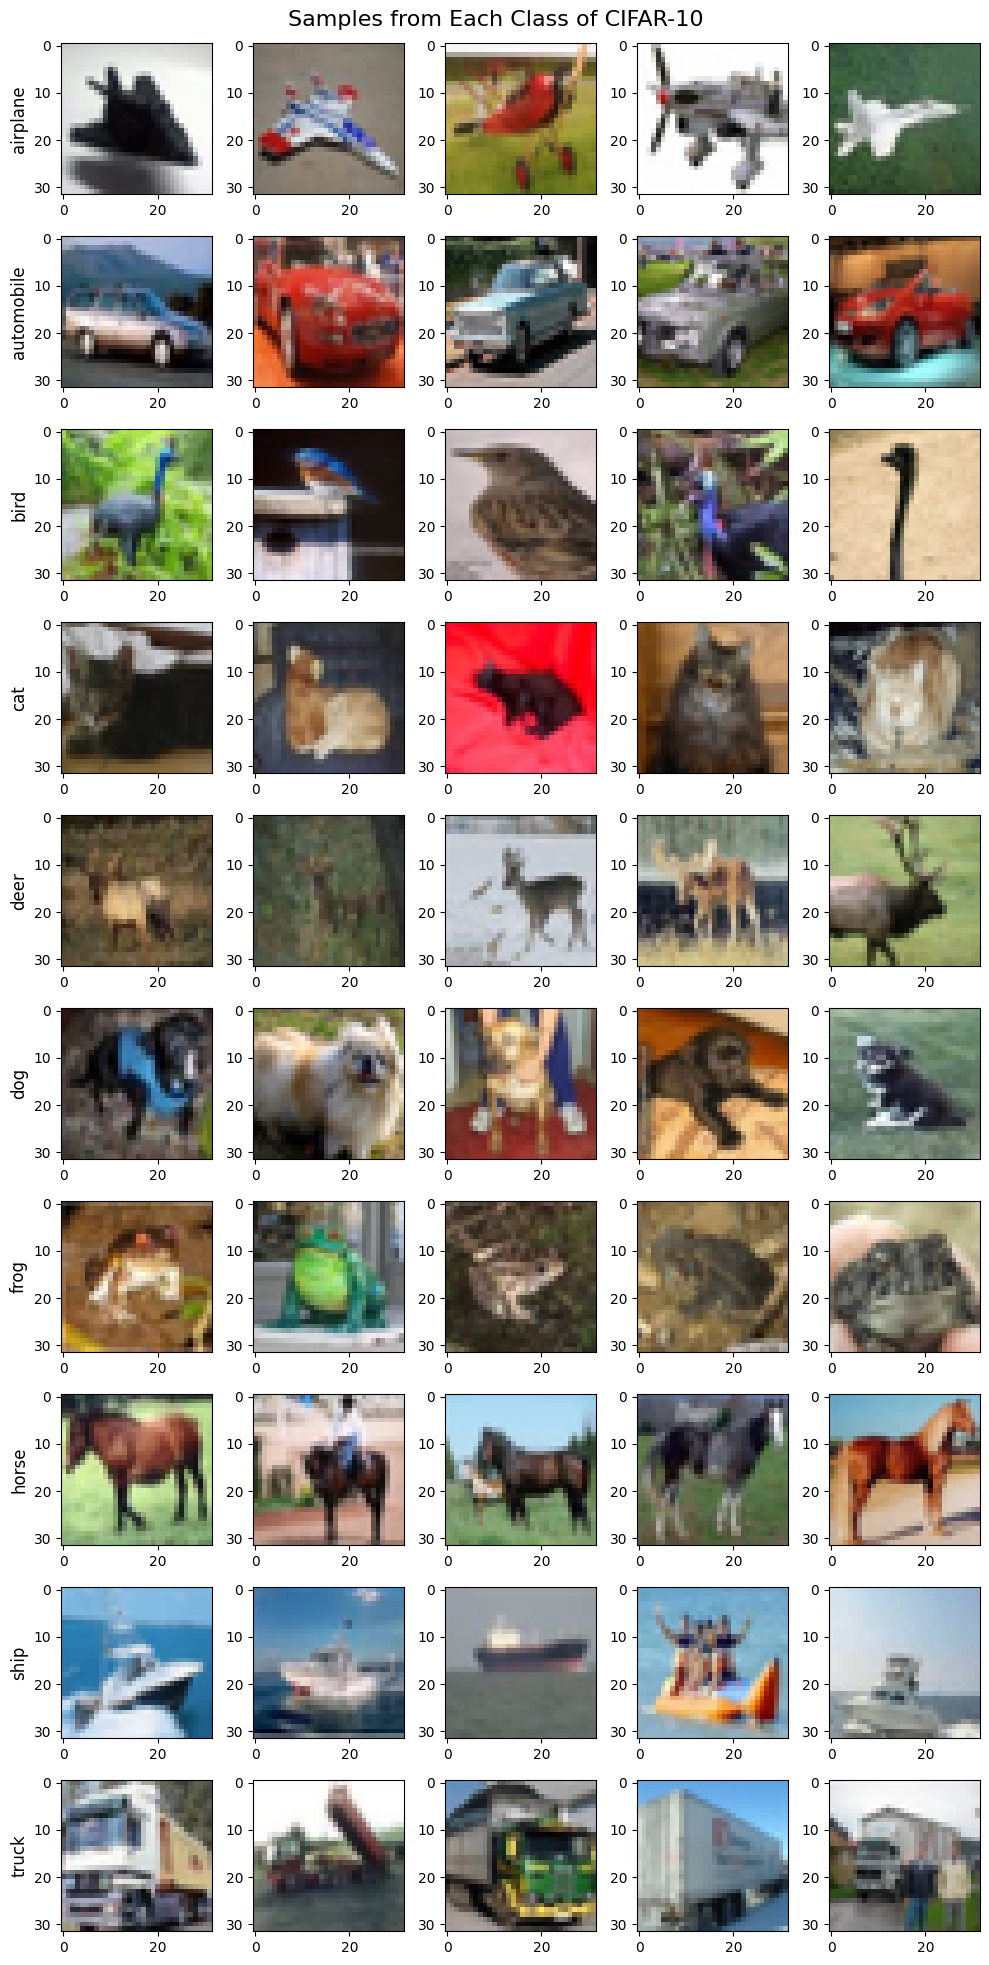

In [ ]:
#Your code here
fig, axes = plt.subplots(10, 5, figsize=(10, 20))
fig.suptitle('Samples from Each Class of CIFAR-10', fontsize=16)

for i, label in enumerate(LABELS):
    idx = np.where(y_dev.flatten() == i)[0][:5]
    for j in range(5):
        axes[i, j].imshow(x_dev[idx[j]])
        if j == 0:
            axes[i, j].set_ylabel(label, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [3]:
#Your code here
print("Shape of x_dev:", x_dev.shape)
print("Shape of y_dev:", y_dev.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_dev: (50000, 32, 32, 3)
Shape of y_dev: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [4]:
#Your code here
x_dev_flattened = x_dev.reshape(x_dev.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
print("Shape of flattened x_dev:", x_dev_flattened.shape)
print("Shape of flattened x_test:", x_test_flattened.shape)

Shape of flattened x_dev: (50000, 3072)
Shape of flattened x_test: (10000, 3072)


In [5]:
#Your code here
x_dev_standardized = x_dev_flattened / 255
x_test_standardized = x_test_flattened /255

In [6]:
#Your code here
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_dev_encoded = encoder.fit_transform(y_dev).toarray()
y_test_encoded = encoder.transform(y_test).toarray()

In [7]:
#Your code here
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_dev_standardized, y_dev_encoded, test_size=0.2, random_state=42)
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (40000, 3072)
Shape of y_train: (40000, 10)
Shape of x_val: (10000, 3072)
Shape of y_val: (10000, 10)


### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Your code here
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [ ]:
#Your code here
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

- No. of parameters for the first layer: (3072 + 1) * 128 = 393344
- No. of parameters for the hidden layer: (128 + 1) * 64 = 8256
- No. of parameters for the last layer: (64 + 1) * 10 = 650

###2.5 Do you think the number of parameters is dependent on the image height and width?

In [ ]:
#Your comments here

The number of parameters in the neural network is dependent on the image height and width. This is because the input layer size is determined by the flattened size of the images, which is equal to height * width * channels. In this case, the input layer has 32 * 32 * 3 = 3072 nodes, which directly affects the number of weights and biases in the first layer.


**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [ ]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(x_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [9]:
#Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2448 - loss: 2.0996 - val_accuracy: 0.3490 - val_loss: 1.8315
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3592 - loss: 1.8042 - val_accuracy: 0.3898 - val_loss: 1.7119
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3950 - loss: 1.7002 - val_accuracy: 0.3879 - val_loss: 1.7120
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4094 - loss: 1.6599 - val_accuracy: 0.4108 - val_loss: 1.6531
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4284 - loss: 1.6111 - val_accuracy: 0.4276 - val_loss: 1.6006
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4398 - loss: 1.5759 - val_accuracy: 0.4251 - val_loss: 1.6074
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4499 - loss: 1.5434 - val_accuracy: 0.4253 - val_loss: 1.5983
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4574 - loss: 1.5196 - val_accu

###2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


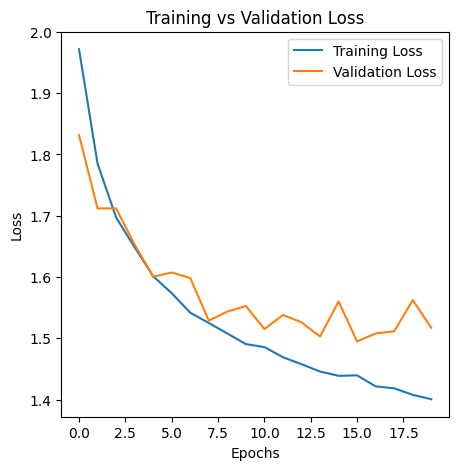

In [14]:
#Your code here
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

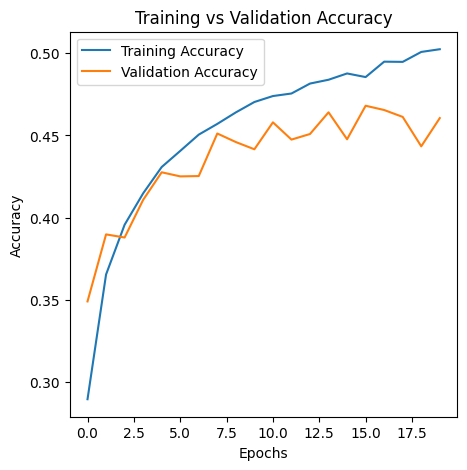

In [15]:
#Your code here
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [12]:
#Your code here
loss, accuracy = model.evaluate(x_test_standardized, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.4994
Test Accuracy: 0.4654


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


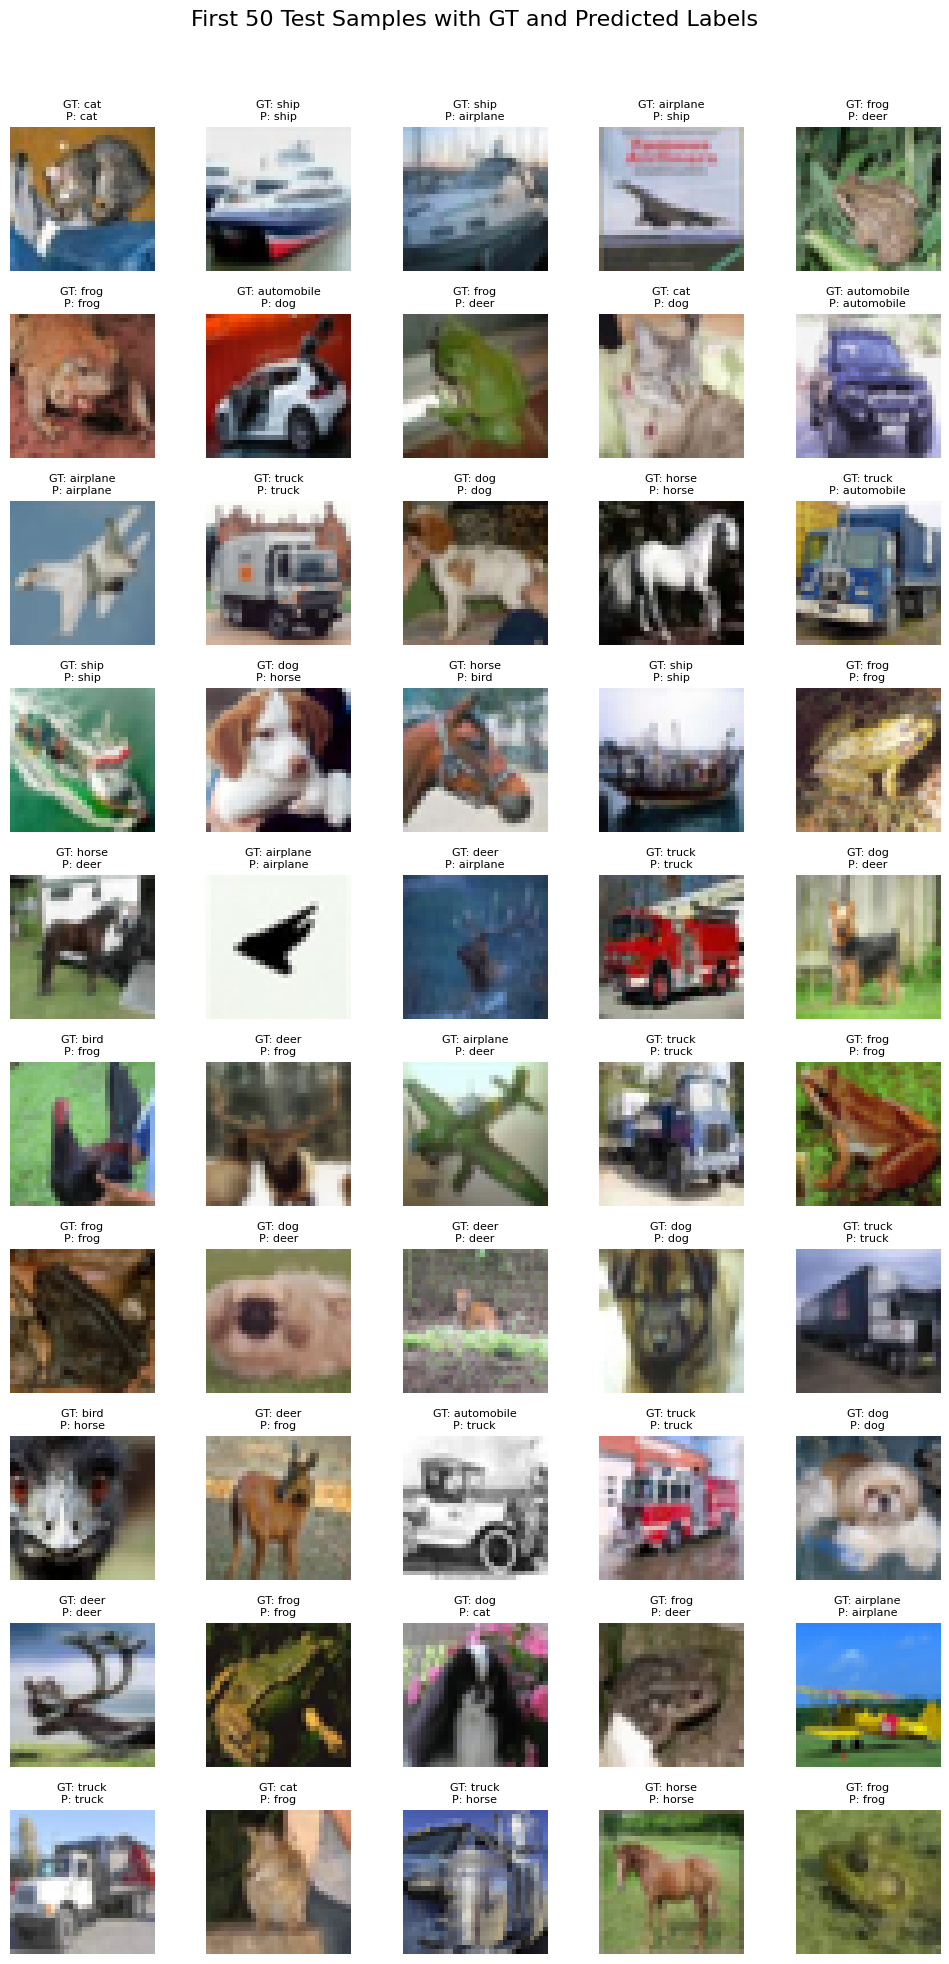

In [13]:
#Your code here
fig, axes = plt.subplots(10, 5, figsize=(10, 20))
fig.suptitle('First 50 Test Samples with GT and Predicted Labels', fontsize=16)

predictions = model.predict(x_test_standardized[:50])
predicted_classes = np.argmax(predictions, axis=1)

y_test_labels = y_test[:50].flatten()

for i in range(10):
    for j in range(5):
        index = i * 5 + j
        gt_label = LABELS[y_test_labels[index]]
        pred_label = LABELS[predicted_classes[index]]
        axes[i, j].imshow(x_test[index])
        axes[i, j].axis('off')
        axes[i, j].set_title(f"GT: {gt_label}\nP: {pred_label}", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [17]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [18]:
#Your code here
model_lenet = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

Output layer should use softmax activation for multi-class classification.

### 3.2 Report the model summary

In [ ]:
#Your code here
model_lenet.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [19]:
#Your code here
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lenet = model_lenet.fit(X_train, to_categorical(y_train), validation_data=(X_val, to_categorical(y_val)), epochs=20, batch_size=128)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 160ms/step - accuracy: 0.2809 - loss: 1.9597 - val_accuracy: 0.4401 - val_loss: 1.5538
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.4728 - loss: 1.4770 - val_accuracy: 0.4915 - val_loss: 1.4022
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.5129 - loss: 1.3558 - val_accuracy: 0.5377 - val_loss: 1.2966
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step - accuracy: 0.5477 - loss: 1.2630 - val_accuracy: 0.5404 - val_loss: 1.3089
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.5671 - loss: 1.2100 - val_accuracy: 0.5659 - val_loss: 1.2337
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.5945 - loss: 1.1469 - val_accuracy: 0.5674 - val_loss: 1.2100
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 120ms/step - accuracy: 0.6052 - loss: 1.1037 - val_accuracy: 0.5959 - val_loss: 1.1585
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - accuracy: 0.6294 - loss: 1

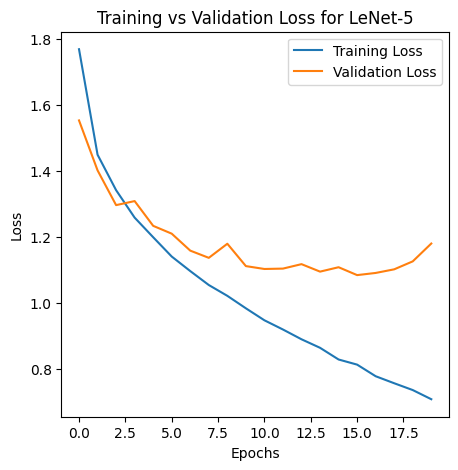

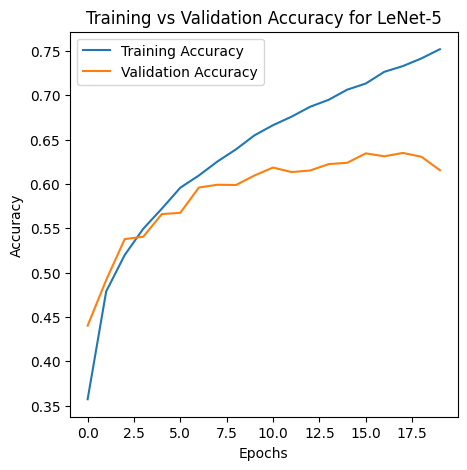

In [20]:
#Your code here
plt.figure(figsize=(5, 5))
plt.plot(history_lenet.history['loss'], label='Training Loss')
plt.plot(history_lenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for LeNet-5')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history_lenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_lenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for LeNet-5')
plt.legend()
plt.show()

In [21]:
#Your code here
loss_lenet, accuracy_lenet = model_lenet.evaluate(x_test, to_categorical(y_test), verbose=0)
print(f"Test Loss for LeNet-5: {loss_lenet:.4f}")
print(f"Test Accuracy for LeNet-5: {accuracy_lenet:.4f}")

Test Loss for LeNet-5: 1.1784
Test Accuracy for LeNet-5: 0.6196


### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

In [22]:
#Your code here
from tensorflow.keras.layers import Dropout

model_lenet_dropout = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(16, kernel_size=(5, 5), padding='valid', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.3),
    Dense(84, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_lenet_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lenet_dropout = model_lenet_dropout.fit(X_train, to_categorical(y_train), validation_data=(X_val, to_categorical(y_val)), epochs=20, batch_size=128)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.1780 - loss: 2.1600 - val_accuracy: 0.3857 - val_loss: 1.7181
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 126ms/step - accuracy: 0.3628 - loss: 1.7282 - val_accuracy: 0.4479 - val_loss: 1.5224
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 119ms/step - accuracy: 0.4124 - loss: 1.6097 - val_accuracy: 0.4817 - val_loss: 1.4502
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.4329 - loss: 1.5569 - val_accuracy: 0.5162 - val_loss: 1.3744
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.4590 - loss: 1.4816 - val_accuracy: 0.5283 - val_loss: 1.3352
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.4795 - loss: 1.4424 - val_accuracy: 0.5402 - val_loss: 1.3047
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.4995 - loss: 1.4031 - val_accuracy: 0.5492 - val_loss: 1.2688
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 124ms/step - accuracy: 0.5018 - loss: 1

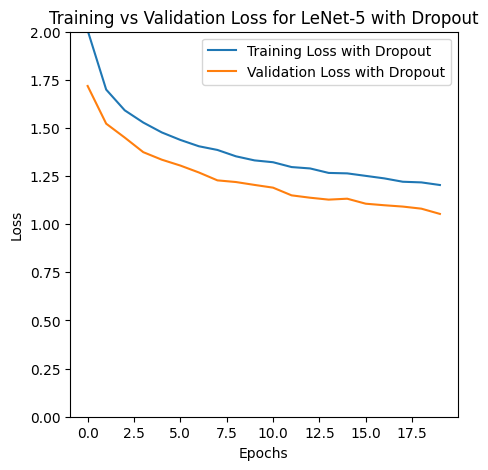

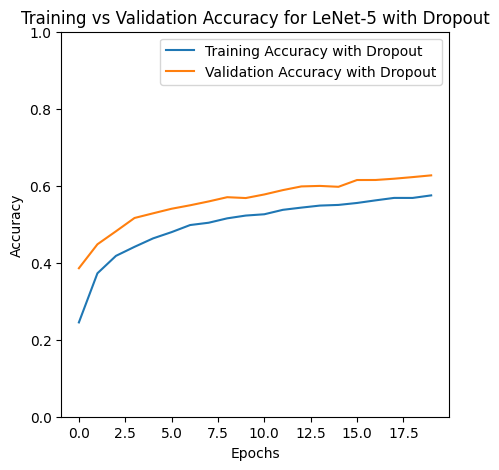

In [23]:
#Your code here
plt.figure(figsize=(5, 5))
plt.plot(history_lenet_dropout.history['loss'], label='Training Loss with Dropout')
plt.plot(history_lenet_dropout.history['val_loss'], label='Validation Loss with Dropout')
plt.xlabel('Epochs')
plt.ylim(0,2)
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for LeNet-5 with Dropout')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history_lenet_dropout.history['accuracy'], label='Training Accuracy with Dropout')
plt.plot(history_lenet_dropout.history['val_accuracy'], label='Validation Accuracy with Dropout')
plt.xlabel('Epochs')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for LeNet-5 with Dropout')
plt.legend()
plt.show()

In [24]:
#Your code here
loss_lenet_dropout, accuracy_lenet_dropout = model_lenet_dropout.evaluate(x_test, to_categorical(y_test), verbose=0)
print(f"Test Loss for LeNet-5 with Dropout: {loss_lenet_dropout:.4f}")
print(f"Test Accuracy for LeNet-5 with Dropout: {accuracy_lenet_dropout:.4f}")

Test Loss for LeNet-5 with Dropout: 1.0569
Test Accuracy for LeNet-5 with Dropout: 0.6350



#### 3.4.2 Batch Normalization

In [28]:
#Your code here
from tensorflow.keras.layers import BatchNormalization

model_lenet_bn = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    BatchNormalization(),
    Dense(84, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model_lenet_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_lenet_bn = model_lenet_bn.fit(X_train, to_categorical(y_train), validation_data=(X_val, to_categorical(y_val)), epochs=20, batch_size=128)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 146ms/step - accuracy: 0.3412 - loss: 1.9022 - val_accuracy: 0.3156 - val_loss: 1.9862
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 149ms/step - accuracy: 0.5355 - loss: 1.3147 - val_accuracy: 0.5298 - val_loss: 1.3339
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 146ms/step - accuracy: 0.5984 - loss: 1.1281 - val_accuracy: 0.5842 - val_loss: 1.1698
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.6438 - loss: 1.0221 - val_accuracy: 0.6040 - val_loss: 1.1143
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.6778 - loss: 0.9295 - val_accuracy: 0.5859 - val_loss: 1.1780
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.6961 - loss: 0.8632 - val_accuracy: 0.6285 - val_loss: 1.0664
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 147ms/step - accuracy: 0.7221 - loss: 0.7946 - val_accuracy: 0.6113 - val_loss: 1.1451
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.7405 - loss: 0

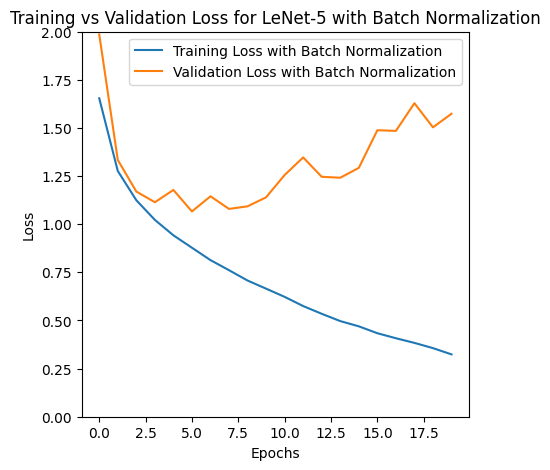

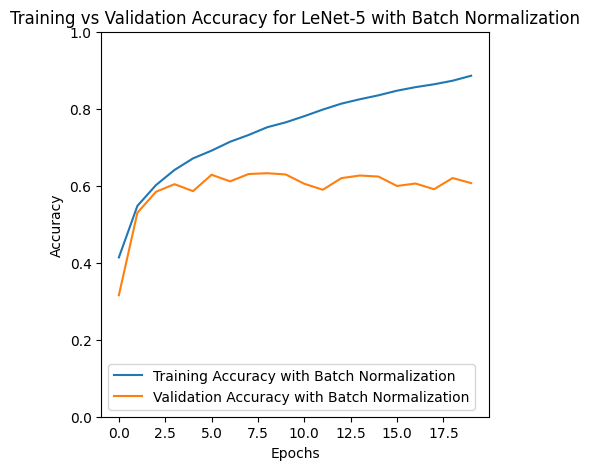

In [29]:
#Your code here
plt.figure(figsize=(5, 5))
plt.plot(history_lenet_bn.history['loss'], label='Training Loss with Batch Normalization')
plt.plot(history_lenet_bn.history['val_loss'], label='Validation Loss with Batch Normalization')
plt.xlabel('Epochs')
plt.ylim(0,2)
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for LeNet-5 with Batch Normalization')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history_lenet_bn.history['accuracy'], label='Training Accuracy with Batch Normalization')
plt.plot(history_lenet_bn.history['val_accuracy'], label='Validation Accuracy with Batch Normalization')
plt.xlabel('Epochs')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for LeNet-5 with Batch Normalization')
plt.legend()
plt.show()

In [30]:
#Your code here
loss_lenet_bn, accuracy_lenet_bn = model_lenet_bn.evaluate(x_test, to_categorical(y_test), verbose=0)
print(f"Test Loss for LeNet-5 with Batch Normalization: {loss_lenet_bn:.4f}")
print(f"Test Accuracy for LeNet-5 with Batch Normalization: {accuracy_lenet_bn:.4f}")

Test Loss for LeNet-5 with Batch Normalization: 1.5931
Test Accuracy for LeNet-5 with Batch Normalization: 0.6050


#### 3.4.3 Compare

In [ ]:
#Your comments here

In terms of test loss, the model with Dropout shows significantly lower loss compared to Batch Normalization (1.0569 vs. 1.5931). This indicates that the Dropout model is better at minimizing prediction errors on the test set.

In terms of test accuracy, the model with Dropout also performs better with an accuracy of 63.50%, compared to 60.50% for Batch Normalization. This means that Dropout results in a model that is more effective at classifying the test data correctly.

In this case (Adam optimizer and 128 batch size), the model with Dropout is more effective at mitigating overfitting.